In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [74]:
data = pd.read_csv("countries.csv")

In [75]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


# Clustering by Latitude and Longitude

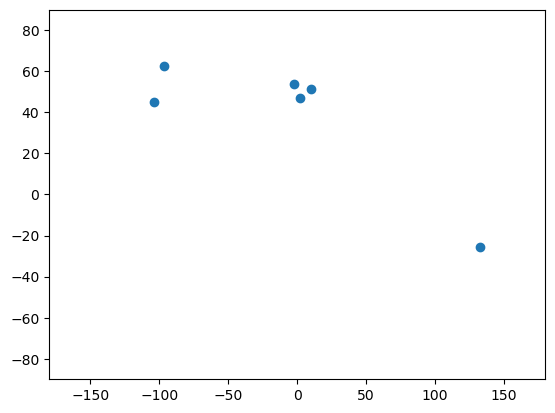

In [76]:
plt.scatter(data["Longitude"], data["Latitude"])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [77]:
x = data.loc[:, ["Latitude", "Longitude"]] 
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [78]:
kmeans = KMeans(3, random_state=42)

In [79]:
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [80]:
identified_clusters = kmeans.predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [81]:
data_with_clusters = data.copy()
data_with_clusters["Cluster"] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


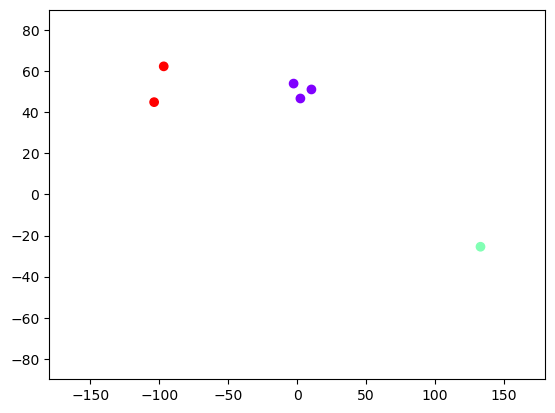

In [82]:
plt.scatter(data_with_clusters["Longitude"], data_with_clusters["Latitude"], c=data_with_clusters["Cluster"], cmap="rainbow")
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

# Clustering by Language

In [83]:
data_mapped = data.copy()
data_mapped["Language"] = data_mapped["Language"].map({ "English": 0, "French": 1, "German": 2 })
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [84]:
x = data_mapped.loc[:, ["Language"]]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


In [85]:
kmeans = KMeans(3, random_state=42)
kmeans.fit(x)
identified_clusters = kmeans.predict(x)

In [86]:
data_with_clusters = data_mapped.copy()
data_with_clusters["Cluster"] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,1


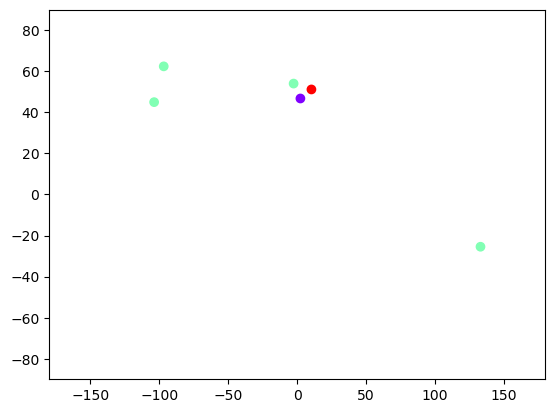

In [87]:
plt.scatter(data_with_clusters["Longitude"], data_with_clusters["Latitude"], c=data_with_clusters["Cluster"], cmap="rainbow")
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

# Clustering by Latitude, Longitude and Language

In [88]:
x = data_mapped.loc[:, ["Latitude", "Longitude", "Language"]]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


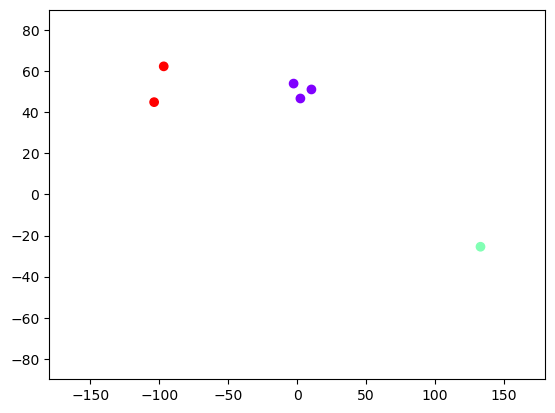

In [96]:
kmeans = KMeans(3, random_state=42)
kmeans.fit(x)
identified_clusters = kmeans.predict(x)

data_with_clusters = data_mapped.copy()
data_with_clusters["Cluster"] = identified_clusters
data_with_clusters

plt.scatter(data_with_clusters["Longitude"], data_with_clusters["Latitude"], c=data_with_clusters["Cluster"], cmap="rainbow")
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [90]:
kmeans.inertia_

290.1052333333333

In [91]:
wcss = []

for i in range(1, 7):
  kmeans = KMeans(i, random_state=42)
  kmeans.fit(x)
  wcss_i = kmeans.inertia_
  wcss.append(wcss_i)



In [92]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.1052333333333,
 113.91233333333332,
 39.00624999999999,
 0.0]

# The Elbow Method

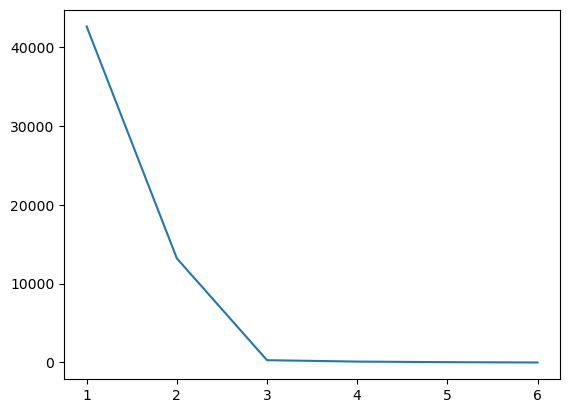

In [93]:
number_of_clusters = range(1, 7)
plt.plot(number_of_clusters, wcss)
plt.show()